# Prima esercitazione: generazione di numeri casuali

In [67]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

## Stima di un semplice integrale ed errore associato

Per testare il generatore di numeri casuali, facciamo una stima dell'integrale
\begin{eqnarray}\langle r \rangle = \int_0^1 r dr = 0.5.\end{eqnarray}
La stima è fatta generando $10^6$ numeri casuali distribuiti uniformemente tra $0$ e $1$, che vengono raggruppati in $N=100$ blocchi da $100$ misure ciascuno.
Ciascun blocco si può considerare un esperimento.

Supponiamo che esperimenti successivi siano tra loro scorrelati. Per le misure ottenute in esperimenti successivi vale la legge dei grandi numeri, perciò all'aumentare del numero di esperimenti fatti è possibile ridurre l'incertezza sulla misura. Infatti questo si osserva nell'andamento di $\langle r\rangle$ e della sua incertezza all'aumentare del numero di blocchi usati per la misura, dal momento che 

\begin{eqnarray}
\sigma\propto\frac{1}{\sqrt{N}}\end{eqnarray}

Nel seguente grafico è riportata la misura di
\begin{eqnarray}
\langle r\rangle -0.5
\end{eqnarray}

in funzione del numero di esperimenti fatti.

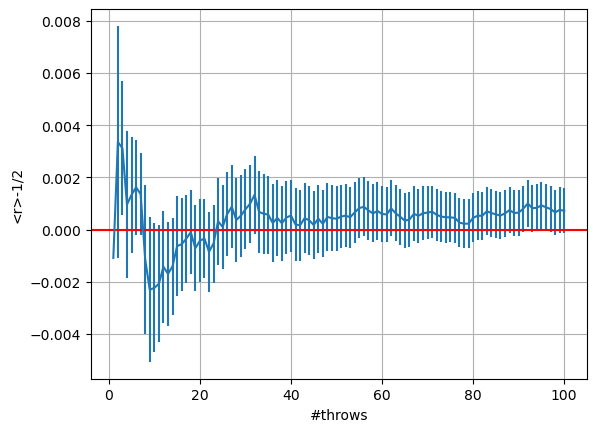

In [68]:
sum_prog = np.loadtxt(fname = "risultati/rMedia.txt")
err_prog = np.loadtxt(fname = "risultati/rErrore.txt")

N = 100
x = np.arange(N)+1

plt.errorbar(x,sum_prog-1/2,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.grid(True)
plt.show()

In [69]:
sum_prog.size, err_prog.size

(100, 100)

Otteniamo all'ultimo passo 
\begin{eqnarray}
\langle r\rangle-0.5=7.2\cdot 10^{-4},
\end{eqnarray}
che è pienamente compatibile con l'errore associato $\sigma_{\langle r\rangle}=8.65\cdot 10^{-4}$.

Stimiamo ora l'errore associato alla misura di $\langle r\rangle$. Per fare ciò, misuriamo la deviazione standard di $r$ dal suo valor medio.
\begin{eqnarray}
\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12\end{eqnarray}
Per questa quantità vale lo stesso discorso fatto sopra.

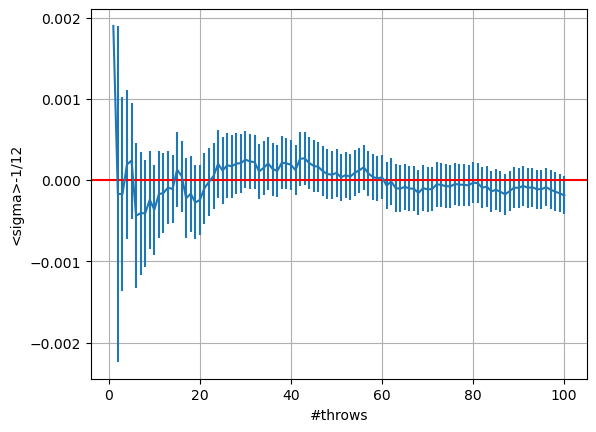

In [70]:
sum_prog = np.loadtxt(fname = "risultati/sigmaMedia.txt")
err_prog = np.loadtxt(fname = "risultati/sigmaErrore.txt")

plt.errorbar(x,sum_prog-1/12,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<sigma>-1/12')
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.grid(True)
plt.show()

Otteniamo all'ultimo passo 
\begin{eqnarray}
\sigma^2-1/12=1.88\cdot 10^{-4},
\end{eqnarray}
che è pienamente compatibile con l'errore associato $\sigma_{\sigma^2}=2.33\cdot 10^{-4}$.

## Test di Pearson

Durante tutto il corso supporremo di usare numeri casuali distribuiti in modo uniforme. In realtà questi numeri sono pseudo-casuali, dato che in verità sono generati tramite un algoritmo deterministico, e quindi riproducibile. Tuttavia questo algoritmo è altamente sensibile alle condizioni iniziali. Per questo, dal nostro punto di vista i numeri così generati sono altamente scorrelati tra di loro, quindi a tutti gli effetti casuali.

Il test di Pearson permette di stimare la probabilità che i numeri generati siano distribuiti in modo uniforme.

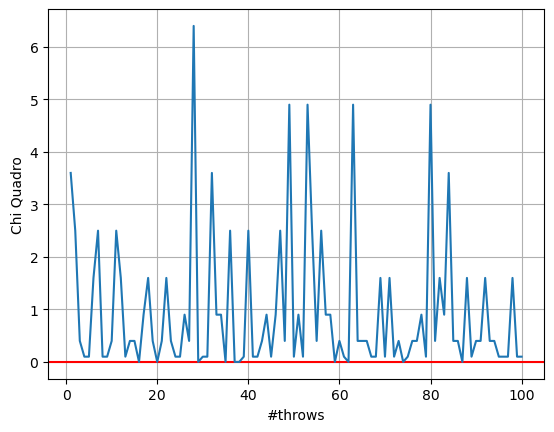

In [71]:
chi_square = np.loadtxt(fname = "risultati/chiQuadro.txt")

plt.errorbar(x,chi_square)
plt.xlabel('#throws')
plt.ylabel('Chi Quadro')
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.grid(True)
plt.show()

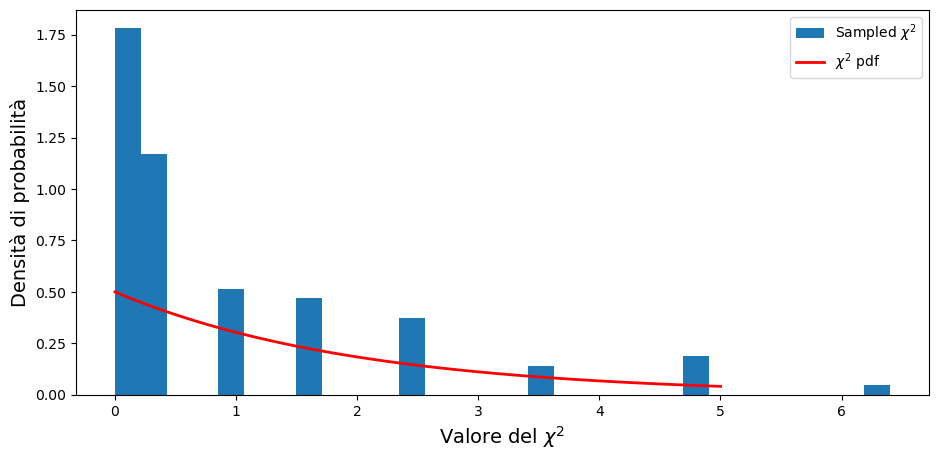

In [72]:
from scipy.stats import chi2

ChiVect=np.loadtxt("risultati/chiQuadro.txt")

plt.figure(figsize=(11,5))
x = np.linspace(0,5,100)

matplotlib.pyplot.hist(ChiVect,bins=30,density=True, label= "Sampled $\chi^2$")
plt.plot(x, chi2.pdf(x, 2), 'r-', lw=2, label='$\chi^2$ pdf')

plt.xlabel("Valore del $\chi^2$", fontsize=14)
plt.ylabel('Densità di probabilità', fontsize=14)

plt.legend()


# Altre distribuzioni di probabilità

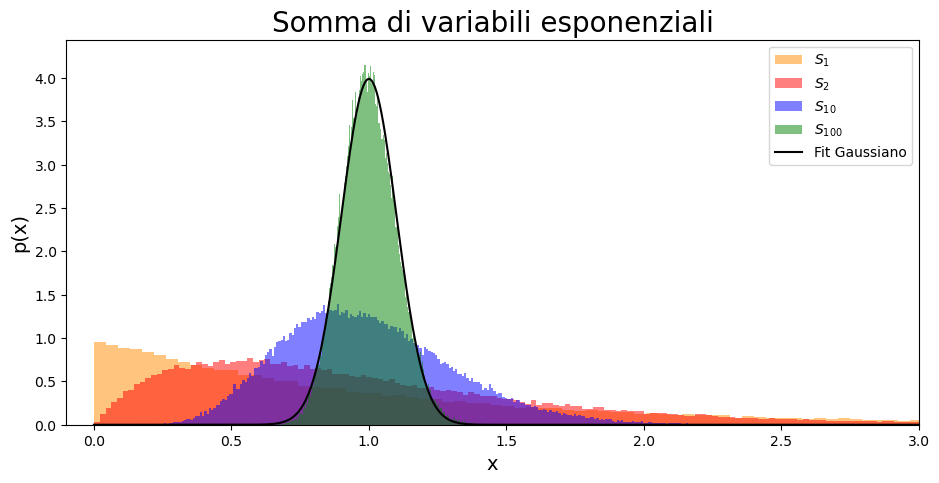

In [73]:
from scipy.stats import norm  

index = ["1","2","10","100"]
color = ['darkorange', "red", "blue", "green"]

x = np.linspace(0.,3,500)

plt.figure(figsize=(11,5))

for i in range (0,4):
    LCTexp = np.loadtxt("risultati/outfileLCTexp"+index[i]+".txt")
    matplotlib.pyplot.hist(LCTexp,bins=350, label="$S_{"+index[i]+"}$", density=True,color=color[i], alpha=0.5)

plt.plot(x, norm.pdf(x, 1, 1/10), 'black', lw=1.5, label='Fit Gaussiano',)

plt.title("Somma di variabili esponenziali", fontsize=20)
plt.xlabel("x", fontsize=14)
plt.ylabel('p(x)', fontsize=14) 
plt.xlim(-0.1,3)

plt.legend()   
plt.show()  


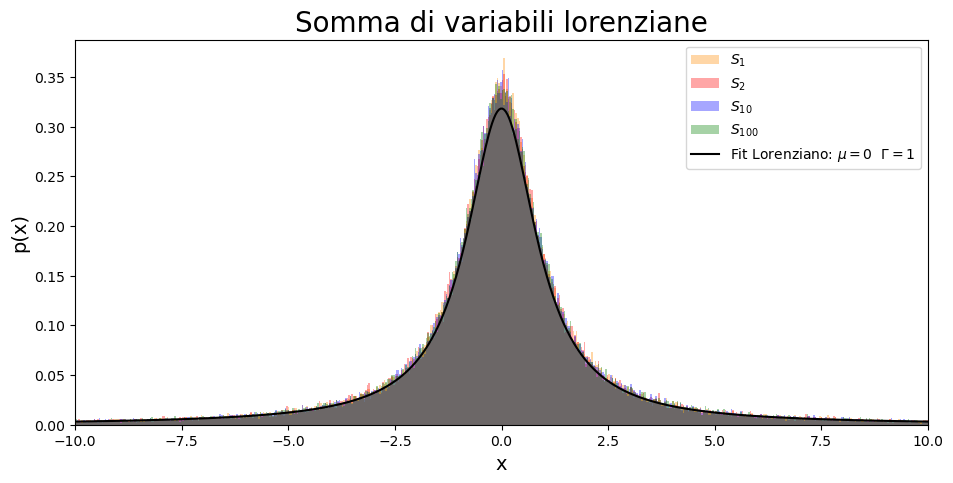

In [74]:
from scipy.stats import cauchy

index = ["1","2","10","100"]
color = ['darkorange', "red", "blue", "green"]
x = np.linspace(-10,10,500)

plt.figure(figsize=(11,5))

for i in range (0,4):
    LCTexp = np.loadtxt("risultati/outfileLCTlor"+index[i]+".txt")
    matplotlib.pyplot.hist(LCTexp,range = (-10,+10),bins=550, label="$S_{"+index[i]+"}$", density=True,color=color[i], alpha=0.35)

y = cauchy.pdf(x,0,1)
plt.plot(x, y, color = 'black', linestyle = '-', label = "Fit Lorenziano: $\mu=0$  $\Gamma=1$")

plt.title("Somma di variabili lorenziane", fontsize=20)
plt.xlabel("x", fontsize=14)
plt.ylabel('p(x)', fontsize=14) 
plt.xlim(-10,10)

plt.legend()   
plt.show()  

# Stima di $\pi$ con l'esperimento di Buffon


<div style="text-align:center;">
    <img src="https://mathworld.wolfram.com/images/eps-svg/BuffonNeedle_700.svg" alt="Image" style="display:inline-block;">
</div>


Georges-Louis Leclerc, conte di Buffon, nel 1977 stimò che la probabilità che un ago atterri su una riga è
\begin{eqnarray}
P=\frac{2L}{\pi d}
\end{eqnarray}
Successivamente Laplace nel 1820 suggerì che possiamo stimare $\pi$ misurando il rapporto tra il numero di aghi che atterra su una riga e il numero totale di aghi, tramite la formula 
\begin{eqnarray}
\pi=\frac{2L}{Pd}=\frac{2L}{d}\lim_{N_\text{lanci}\rightarrow\infty}\frac{N_\text{lanci}}{N_\text{colpiti}}
\end{eqnarray}


<div style="text-align:center;">
    <img src="https://mathworld.wolfram.com/images/eps-svg/BuffonNeedleTosses_825.svg" alt="Image" style="display:inline-block;">
</div>




## Implemento la misura di $\pi$ nel python:

3.1401116657067893

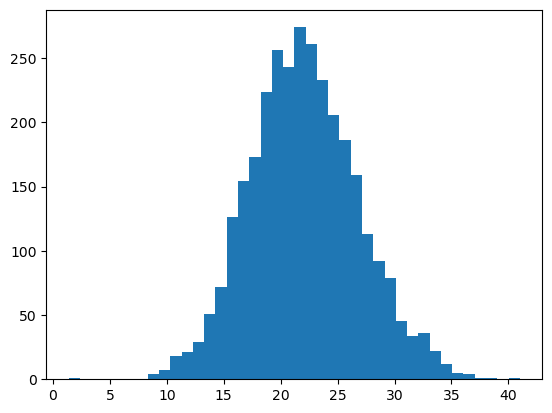

In [75]:
M=500000
d = 3 #spaziatura righe
L = 1.4 #lunghezza ago

np.random.seed(3) 
o = np.random.rand(M)*d

#da -L a L
x = np.random.rand(M)
x = (x*2-1)*L
y = np.random.rand(M)
y = (y*2-1)*L

#quadrato di raggio L, butto via quelli fuori dal cerchio
a = y[(x**2+y**2)<L]

x= x[(x**2+y**2)<L]

y=a

#plt.scatter(x,y,s=.1)
# controllo l'uniformità di questi angoli
theta = np.arctan2(x,y)

v=np.empty([])

for angle in np.arange (0, 3.14159/2,.0005):
    
    num = (theta[(theta >angle) & (theta <angle+0.0005)] ).size
    v=np.append(v, num)
    
n, bins, patches = plt.hist(v,40)
v
#verifica se c'è l'intersezione

x=np.divide(x,np.sqrt(x**2+y**2))*L


xPunta = o[0:x.size]+x;

vettoreIntersezioni =  xPunta[(xPunta>d) | (xPunta<0.)]

colpiti = vettoreIntersezioni.size

P = colpiti/x.size
pigreco = (2/P)*(L/d)
pigreco

## Eseguo la misura di $\pi$ tramite codice c++:

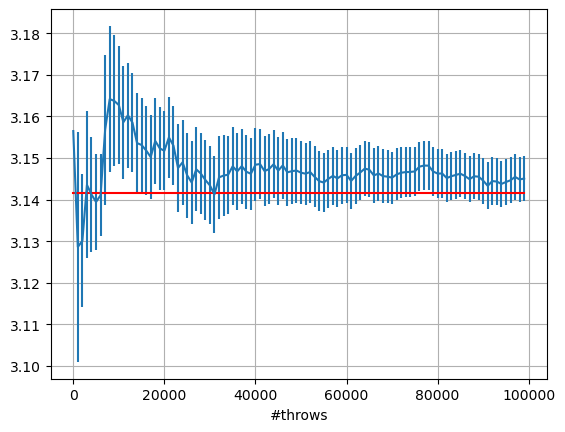

In [77]:
M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block (=experiment)
d = 1.27
l=1.

x = np.arange(N)      # [0,1,2,...,N-1]

x*=L                  # Number of throws = block * (Number of throws in each block)

sum_prog = np.loadtxt(fname = "risultati/rMedia.txt")
err_prog = np.loadtxt(fname = "risultati/rErrore.txt")

pigreco= (2./sum_prog)*(l/d)
errPi = err_prog *pigreco/sum_prog

pi_array = np.full(N, np.pi)

plt.errorbar(x,pigreco,yerr=errPi)
plt.xlabel('#throws')
plt.plot(x, pi_array, label='pi', color="red")
plt.grid(True)
plt.show()